In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_context('talk')
np.set_printoptions(suppress=True) 
    ### not xEyy format(science float format)
%matplotlib inline    

In [2]:
import scipy.io
data = scipy.io.loadmat('ex3data1.mat')

X = data['X']
y = data['y']

In [109]:
def displayData(X, ex_width=0, fig_size=4):
    m, n = X.shape
    if ex_width == 0:
        ex_width = int(math.sqrt(n))
    ex_height = n/ex_width
    rows = int(math.sqrt(m))
    cols = int(m/rows)
    pad = 2
    
    display_arr = -np.ones([pad + rows * (ex_width + pad),
                       pad + cols * (ex_height + pad)])

    idx = 0
    for i in range(rows):
        for j in range(cols):
            max_val = np.max(np.abs(display_x[idx]))
            display_arr[
                (pad + i*(ex_width+pad)) : ((i+1)*(ex_width+pad)), 
                (pad + j*(ex_height+pad)) : ((j+1)*(ex_height+pad))
            ] = display_x[idx].reshape(ex_height, ex_width).T/max_val
            idx += 1

    plt.figure(figsize=(fig_size,fig_size));
    plt.imshow(display_arr, cmap='gray');

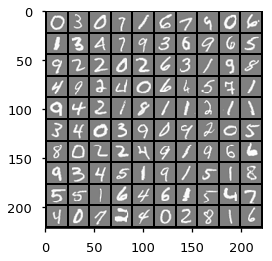

In [110]:
rand_indices = np.random.permutation(len(X))[:100]
display_x = X[rand_indices]
displayData(display_x)

In [5]:
def sigmoid(z):
    return (1.0/(1.0+np.exp(-z)))

def lrCostFunction(theta, X, y, lamb):
    m = len(y)
    
    hx = sigmoid(np.dot(X, theta))
    J1 = - y * np.log(hx)
    J2 = (1.0 - y) * np.log(1.0 - hx)
    theta_but0 = theta[1:]
    J3 = lamb / (2.0 * m) * np.sum(theta_but0**2)
    J = 1.0 / m * np.sum(J1 - J2)
    J = J + J3
    
    g1 = (lamb/m * theta).reshape(-1, 1)
    g1[0] = 0
    grad = 1.0 / m * np.sum((hx - y) * X, axis=0)
    grad = grad.reshape(-1, 1) + g1
    
    return J, grad
    

In [6]:
theta_t = np.array([[-2],[-1],[1],[2]])
X_t = np.arange(1,16).reshape(3,5).T
X_t = np.append(np.ones([5,1]), X_t/10.0, axis=1)
y_t = np.array([1,0,1,0,1]).reshape(-1,1)
lamb = 3.0
J, grad = lrCostFunction(theta_t, X_t, y_t, lamb)
print J      ### 2.534819
print grad   ### 0.146561, -0.548558, 0.724722, 1.398003 

2.534819396109744
[[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]]


In [7]:
import scipy.optimize as opt
def costJReg(theta, *args):
    theta = theta.reshape(-1,1)
    X, y, lamb = args
    m = len(y)
    
    hx = sigmoid(np.dot(X, theta))
    J1 = - y * np.log(hx)
    J2 = (1.0 - y) * np.log(1.0 - hx)
    theta_but0 = theta[1:]
    J3 = lamb / (2.0 * m) * np.sum(theta_but0**2)
    J = 1.0 / m * np.sum(J1 - J2)
    J = J + J3
    return J

def gradJReg(theta, *args):
    theta = theta.reshape(-1,1)
    X, y, lamb = args
    m = len(y)
    hx = sigmoid(np.dot(X, theta))
    
    g1 = (lamb/m * theta)
    g1[0] = 0
    grad = 1.0 / m * np.sum((hx - y) * X, axis=0)
    grad = grad + g1.flatten()
    return grad
    
def find_min_reg(X, y, theta, lamb):
    ncg = opt.fmin_cg(costJReg, theta, fprime=gradJReg, 
                   args=(X, y, lamb), full_output=True, disp=False)
    return ncg[0], ncg[1]

In [8]:
def oneVsAll(X, y, num_labels, lamb):
    m,n = X.shape
    all_theta = np.zeros([num_labels, n+1])
    X = np.append(np.ones([m, 1]), X, axis=1)
    init_theta = np.zeros([n+1, 1])    
   
    for c in range(num_labels):
        y_c = (y==(c+1)).astype(int)
        theta, cost = find_min_reg(X, y_c, init_theta, lamb)
        all_theta[c, :] = theta
    return all_theta

In [9]:
%%time
num_labels = 10
lamb = 0.1
all_theta = oneVsAll(X, y, num_labels, lamb)

Wall time: 1min 17s


In [57]:
def predictOneVsAll(all_theta, X):
    m = len(X)
    num_labels = len(all_theta)
    p = np.zeros([m,1])
    X = np.append(np.ones([m,1]), X, axis=1)
    
    pp = np.dot(X, all_theta.T)
    for i in range(m):
        p[i] = pp[i].argmax()+1
    return p

In [58]:
pred = predictOneVsAll(all_theta, X)
print 'Training Set Accuracy: %.2f%%'%(
    np.mean((pred==y).astype(int)*100.0))   ### 94.9%

Training Set Accuracy: 96.46%


---
### 2.Neural Network
---

In [60]:
data = scipy.io.loadmat('ex3weights.mat')

In [66]:
Theta1 = data['Theta1']
Theta2 = data['Theta2']
print X.shape
print Theta1.shape
print Theta2.shape

(5000L, 400L)
(25L, 401L)
(10L, 26L)


In [67]:
def predict(theta1, theta2, X):
    m = len(X)
    p = np.zeros([m,1])
    
    X = np.append(np.ones([m,1]), X, axis=1)
    Z2 = np.dot(X, theta1.T)
    A2 = sigmoid(Z2)
    
    A2 = np.append(np.ones([m,1]), A2, axis=1)
    Z3 = np.dot(A2, theta2.T)
    A3 = sigmoid(Z3)
    
    for i in xrange(m):
        k = A3[i].argmax() + 1
        p[i] = k
        
    return p

In [69]:
%%time
pred = predict(Theta1, Theta2, X)
print 'Training Set Accuracy: %.2f%%'%(
    np.mean((pred==y).astype(int)*100.0))  ### 97.5%

Training Set Accuracy: 97.52%
Wall time: 38 ms


Neural Network Prediction: 5, 3, 7, 4, 7, 8, 3, 9,


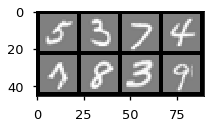

In [147]:
rand_indices = np.random.permutation(len(X))[:8]
display_x = X[rand_indices]
displayData(display_x, fig_size=3);
pred = predict(Theta1, Theta2, display_x);
print 'Neural Network Prediction:',
for i in xrange(len(pred)):
    print '%d,'%(pred[i,0] % 10),